In [19]:
import pandas as pd

In [20]:
array1 = pd.read_excel("../../CountyFair.xlsx")

In [21]:
array1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Physical Postcards  97 non-null     object
 1   Unnamed: 1          96 non-null     object
 2   Unnamed: 2          7 non-null      object
 3   Unnamed: 3          58 non-null     object
 4   Unnamed: 4          2 non-null      object
dtypes: object(5)
memory usage: 3.9+ KB


In [22]:
ds = array1.rename(columns={ "Unnamed: 1": "Year2050", "Unnamed: 2": "Translation1", "Unnamed: 3": "Getting_Here","Unnamed: 4": "Translation2"})

In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Physical Postcards  97 non-null     object
 1   Year2050            96 non-null     object
 2   Translation1        7 non-null      object
 3   Getting_Here        58 non-null     object
 4   Translation2        2 non-null      object
dtypes: object(5)
memory usage: 3.9+ KB


In [18]:
ds

,Physical Postcards,Year2050,Translation1,Getting_Here,Translation2
0,"ARLINGTON COUNTY FAIR (AUGUST 23-25, 2024)",NaN,NaN,NaN,NaN
1,Card No.,"Here I am in the year 2050, and I want to tell...",Translation (when applicable),"Getting here wasn't easy, but it was worth it!...",Translation (when applicable)
2,CF1,Stop overbuilding and over taxing now!,NaN,NaN,NaN
3,CF2,Arlington is a safe and appreciated community.,NaN,I was born here,NaN
4,CF3,Yo trabajo en Extended Day y los pagos son muy...,I work in Extended Day and pay is very low. I ...,NaN,NaN
...,...,...,...,...,...
92,CF91,"Arlington is a friendly, safe, and thriving co...",NaN,By trying to be a community,NaN
93,CF92,Bring back the trolley. We could use more fast...,NaN,NaN,NaN
94,CF93,Taxpayer funded paragliding that you can do fo...,NaN,Money $ (electric motors),NaN
95,CF94,Wish I could buy a home with a yard. I love th...,NaN,NaN,NaN


In [38]:
%%bash
python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.0 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [39]:
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm") 

In [50]:
text = ds['Year2050'].str.cat(sep='')

doc = nlp(text)

#words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

words = [token.text for token in doc if not token.is_stop and not token.is_punct]

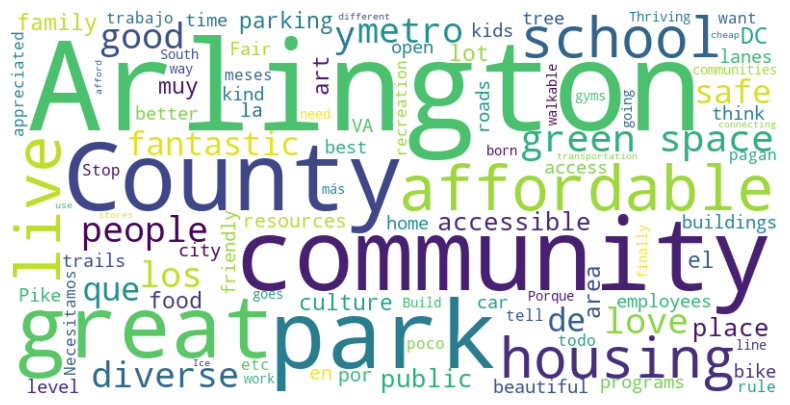

In [51]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, mask=None, contour_width=3, contour_color='steelblue').generate(" ".join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()